In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from scipy.stats import zscore
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [4]:
import scipy.stats as stats
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import scale

In [5]:
df1=pd.read_csv('cubic_zirconia.csv')

In [6]:
df1.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [7]:
df1.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682
26966,26967,1.25,Premium,J,SI1,62.0,58.0,6.90,6.88,4.27,5166


In [8]:
df1.shape

(26967, 11)

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [10]:
df1.drop('Unnamed: 0',axis=1,inplace=True)

In [11]:
df1.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [12]:
df1.duplicated().sum()

34

In [13]:
df1.drop_duplicates(inplace=True)

In [14]:
df1.duplicated().sum()

0

In [15]:
df1.shape

(26933, 10)

In [16]:
df1.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [17]:
df1.describe()

,carat,depth,table,x,y,z,price
count,26933.000000,26236.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000
mean,0.798010,61.745285,57.455950,5.729346,5.733102,3.537769,3937.526120
std,0.477237,1.412243,2.232156,1.127367,1.165037,0.719964,4022.551862
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5356.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [18]:
df1.describe(include='O')

,cut,color,clarity
count,26933,26933,26933
unique,5,7,8
top,Ideal,G,SI1
freq,10805,5653,6565


In [19]:
df1['cut'].unique()

array(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], dtype=object)

In [20]:
df1['color'].unique()

array(['E', 'G', 'F', 'D', 'H', 'J', 'I'], dtype=object)

In [21]:
df1['clarity'].unique()

array(['SI1', 'IF', 'VVS2', 'VS1', 'VVS1', 'VS2', 'SI2', 'I1'],
      dtype=object)

In [22]:
num = df1[['carat','depth', 'table', 'x', 'y', 'z','price' ]]
cat = df1[['carat','cut','clarity']]

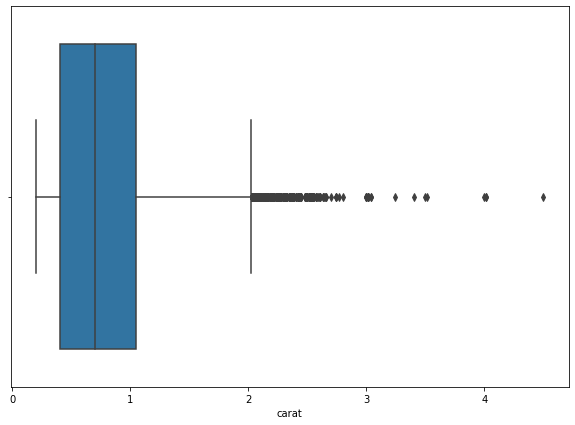

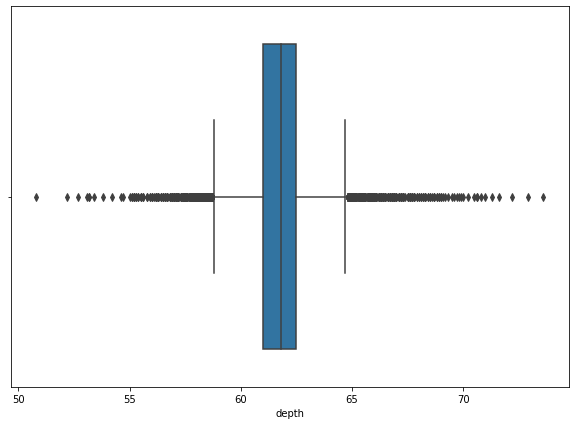

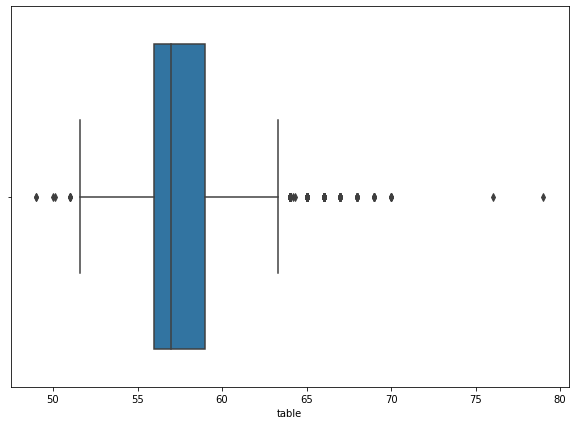

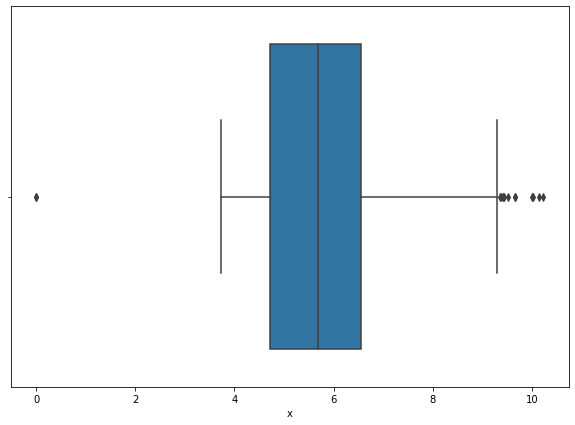

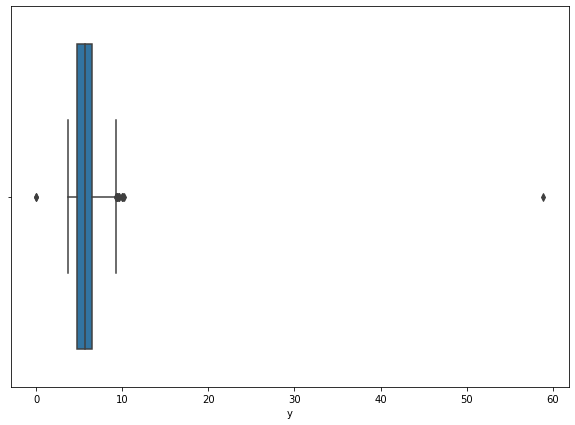

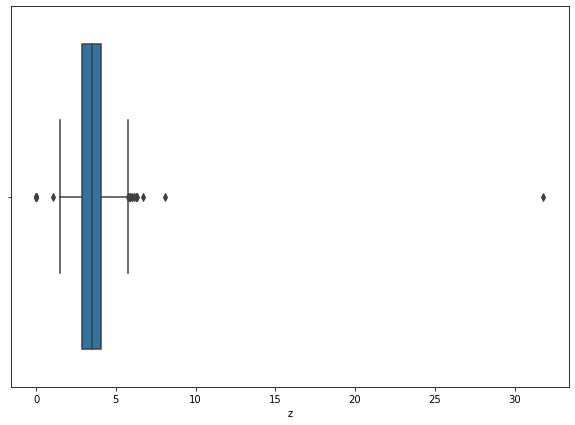

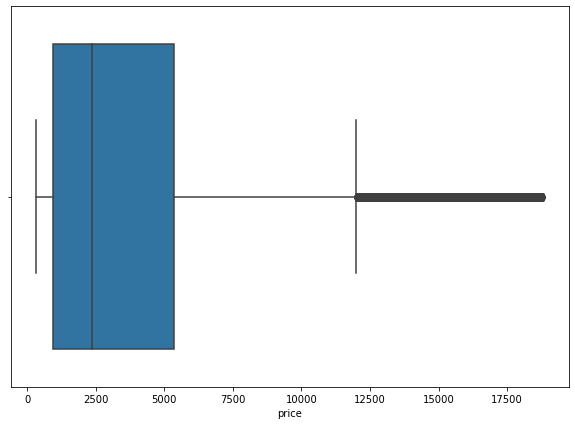

In [23]:
for i in num:
    plt.figure(figsize=(10,7))
    sns.boxplot(data = df1, x = num[i])
    plt.show()

In [24]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [25]:
for column in num.columns:
    lr,ur=remove_outlier(num[column])
    num[column]=np.where(num[column]>ur,ur,num[column])
    num[column]=np.where(num[column]<lr,lr,num[column])

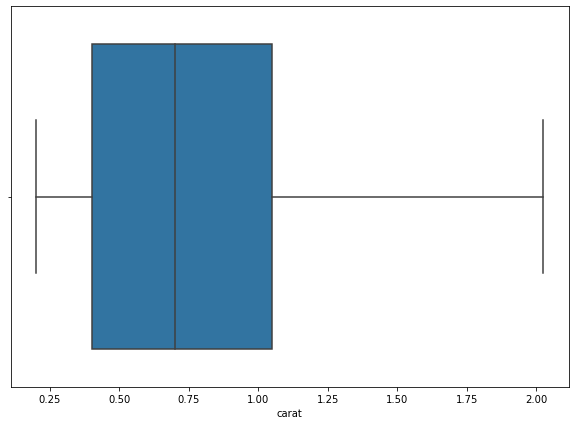

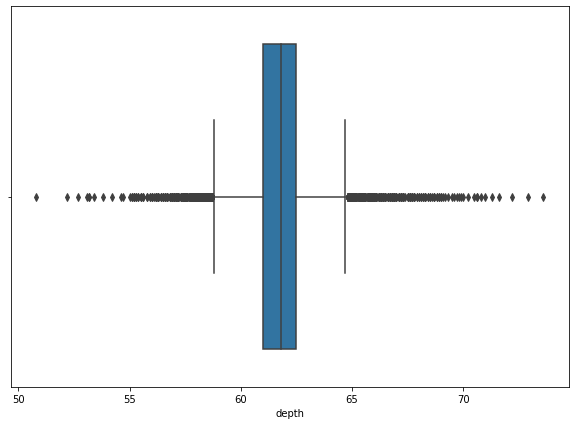

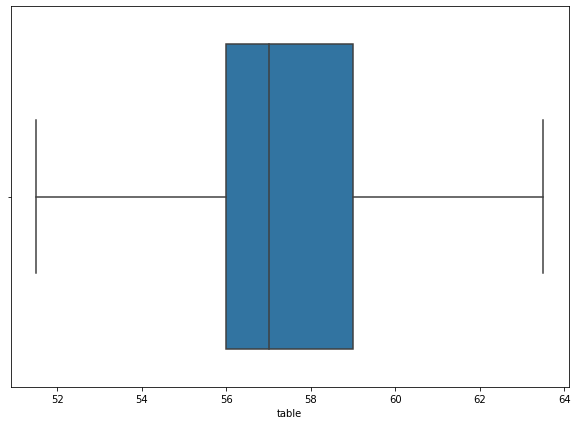

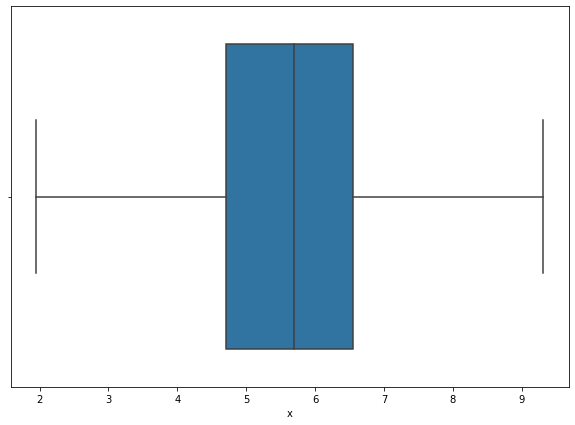

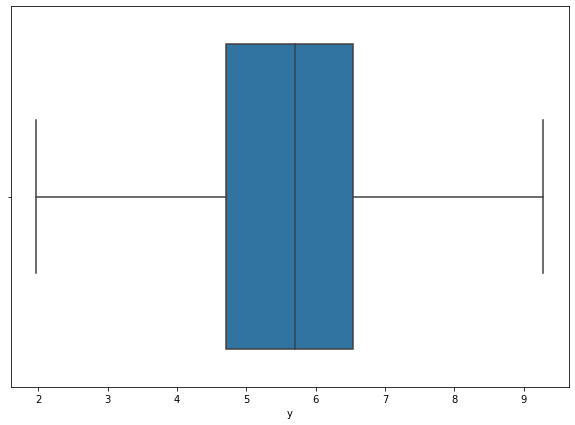

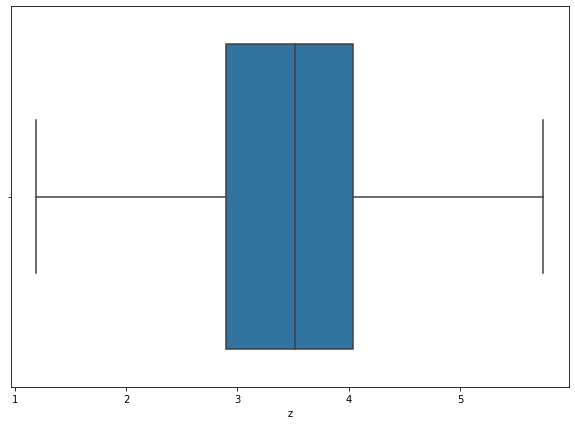

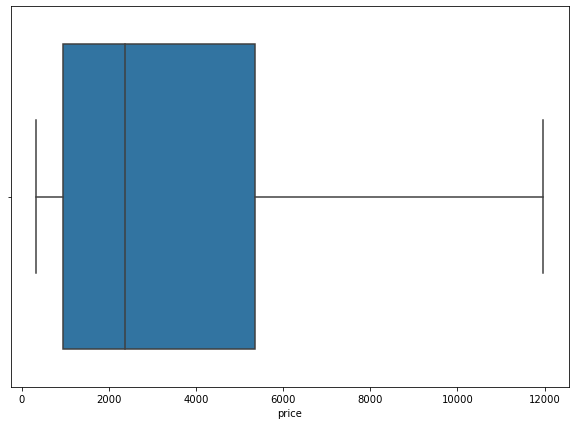

In [26]:
for i in num:
    plt.figure(figsize=(10,7))
    sns.boxplot(data = df1, x = num[i])
    plt.show()

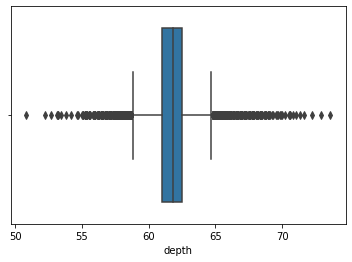

In [27]:
lr,ur=remove_outlier(df1['depth'])
df1['depth']=np.where(df1['depth']>ur,ur,df1['depth'])
df1['depth']=np.where(df1['depth']<lr,lr,df1['depth'])
sns.boxplot(data = df1, x = 'depth');

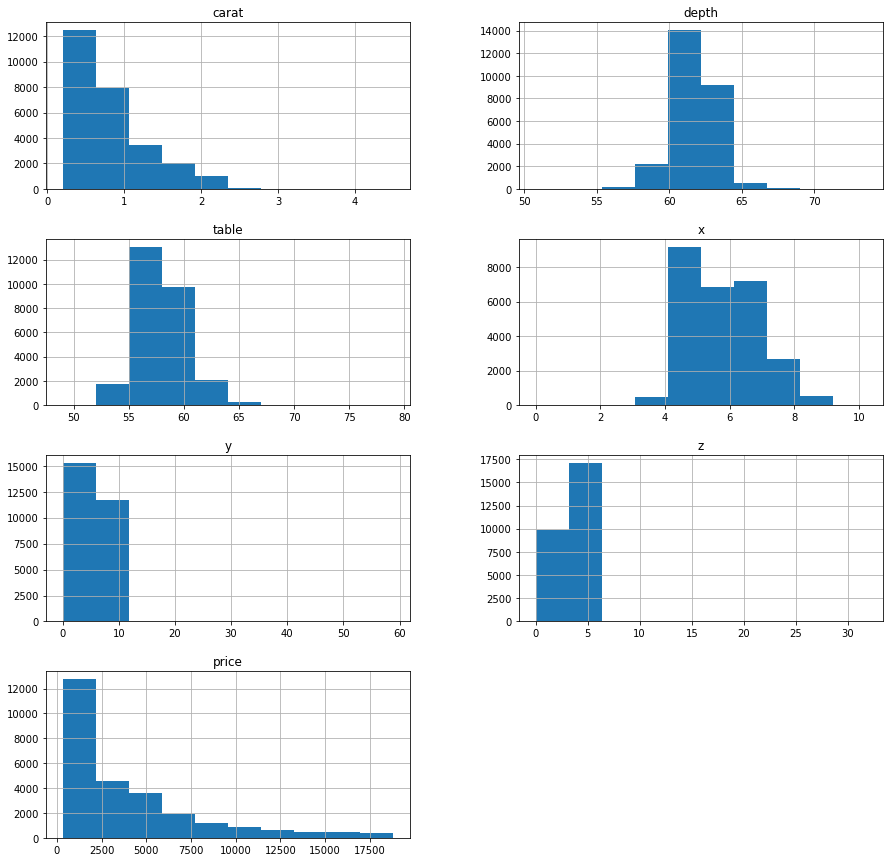

In [28]:
df1.hist(figsize=(15,15),layout=(4,2));

In [29]:
df1.skew()

carat    1.114789
depth   -0.026086
table    0.765805
x        0.392290
y        3.867764
z        2.580665
price    1.619116
dtype: float64

In [30]:
from scipy.stats import shapiro
for i in num:
    print(shapiro(df1[i]))

ShapiroResult(statistic=0.8927116990089417, pvalue=0.0)
ShapiroResult(statistic=nan, pvalue=1.0)
ShapiroResult(statistic=0.9546641111373901, pvalue=0.0)
ShapiroResult(statistic=0.9548916816711426, pvalue=0.0)
ShapiroResult(statistic=0.8939157724380493, pvalue=0.0)
ShapiroResult(statistic=0.9114300608634949, pvalue=0.0)
ShapiroResult(statistic=0.7956832647323608, pvalue=0.0)


In [31]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(num[column].describe(),end=' ')
    print('')
    print('')
    print('')
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(num[column], kde=True, color='r');
    plt.show()
    
    plt.figure()
    print("Boxplot of " + column)
    print("----------------------------------------------------------------------------")
    sns.boxplot(num[column]);
    plt.show()

Description of carat
----------------------------------------------------------------------------
count    26933.000000
mean         0.793298
std          0.462127
min          0.200000
25%          0.400000
50%          0.700000
75%          1.050000
max          2.025000
Name: carat, dtype: float64 


Distribution of carat
----------------------------------------------------------------------------


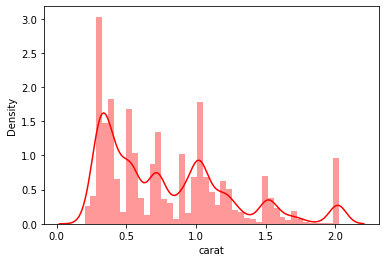

Boxplot of carat
----------------------------------------------------------------------------


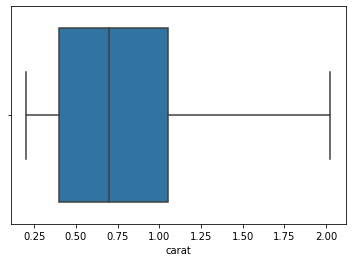

Description of depth
----------------------------------------------------------------------------
count    26236.000000
mean        61.745285
std          1.412243
min         50.800000
25%         61.000000
50%         61.800000
75%         62.500000
max         73.600000
Name: depth, dtype: float64 


Distribution of depth
----------------------------------------------------------------------------


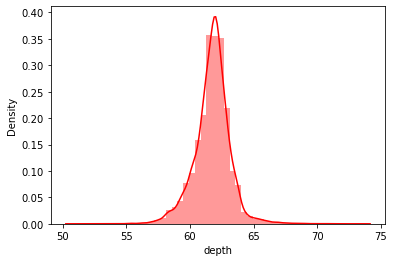

Boxplot of depth
----------------------------------------------------------------------------


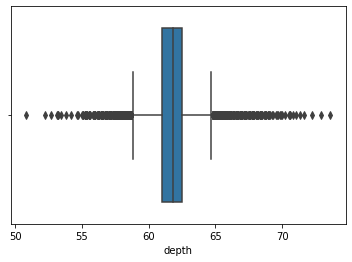

Description of table
----------------------------------------------------------------------------
count    26933.000000
mean        57.435544
std          2.157119
min         51.500000
25%         56.000000
50%         57.000000
75%         59.000000
max         63.500000
Name: table, dtype: float64 


Distribution of table
----------------------------------------------------------------------------


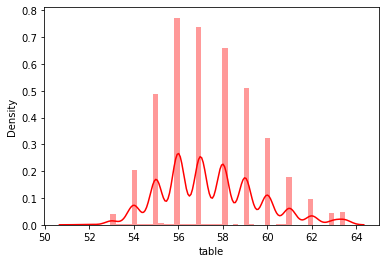

Boxplot of table
----------------------------------------------------------------------------


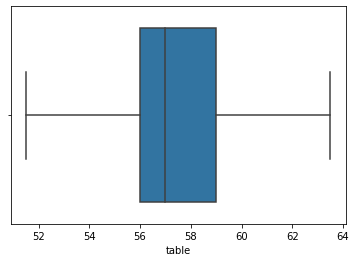

Description of x
----------------------------------------------------------------------------
count    26933.000000
mean         5.729323
std          1.126175
min          1.950000
25%          4.710000
50%          5.690000
75%          6.550000
max          9.310000
Name: x, dtype: float64 


Distribution of x
----------------------------------------------------------------------------


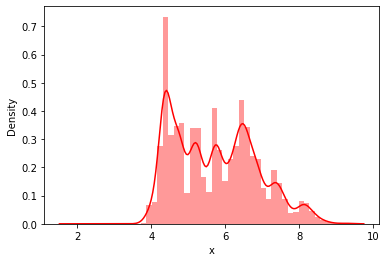

Boxplot of x
----------------------------------------------------------------------------


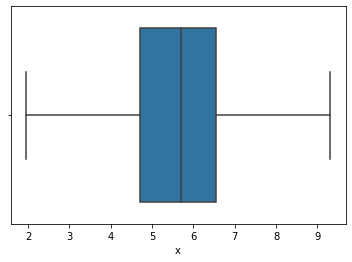

Description of y
----------------------------------------------------------------------------
count    26933.000000
mean         5.731255
std          1.118155
min          1.965000
25%          4.710000
50%          5.700000
75%          6.540000
max          9.285000
Name: y, dtype: float64 


Distribution of y
----------------------------------------------------------------------------


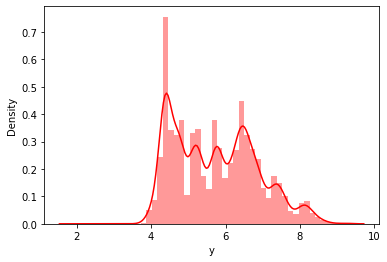

Boxplot of y
----------------------------------------------------------------------------


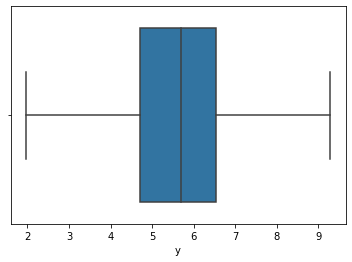

Description of z
----------------------------------------------------------------------------
count    26933.000000
mean         3.536928
std          0.696753
min          1.190000
25%          2.900000
50%          3.520000
75%          4.040000
max          5.750000
Name: z, dtype: float64 


Distribution of z
----------------------------------------------------------------------------


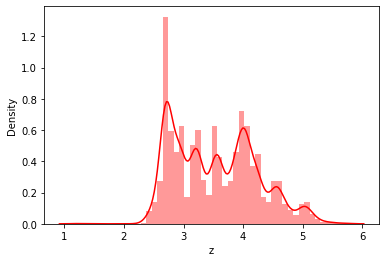

Boxplot of z
----------------------------------------------------------------------------


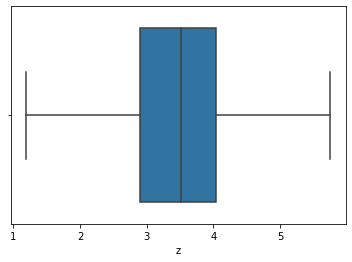

Description of price
----------------------------------------------------------------------------
count    26933.000000
mean      3735.832213
std       3468.207359
min        326.000000
25%        945.000000
50%       2375.000000
75%       5356.000000
max      11972.500000
Name: price, dtype: float64 


Distribution of price
----------------------------------------------------------------------------


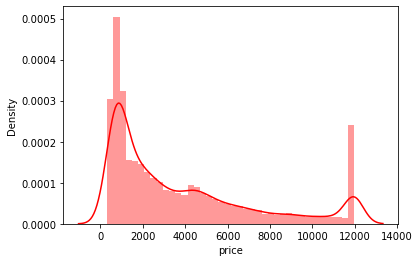

Boxplot of price
----------------------------------------------------------------------------


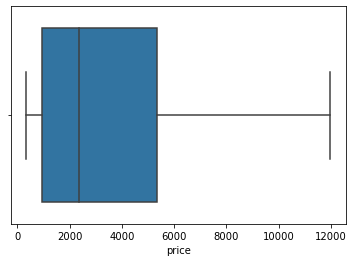

In [32]:
for i in num:
    univariateAnalysis_numeric(i,7)

In [33]:
def univariateAnalysis_categorical(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(cat[column].describe(include='O'),end=' ')
    print('')
    print('')
    print('')
    
    plt.figure()
    print("Bargraph of " + column)
    print("----------------------------------------------------------------------------")
    sns.countplot(y=[column]);
    plt.show()
    

Description of carat
----------------------------------------------------------------------------
count    26933.000000
mean         0.798010
std          0.477237
min          0.200000
25%          0.400000
50%          0.700000
75%          1.050000
max          4.500000
Name: carat, dtype: float64 


Bargraph of carat
----------------------------------------------------------------------------


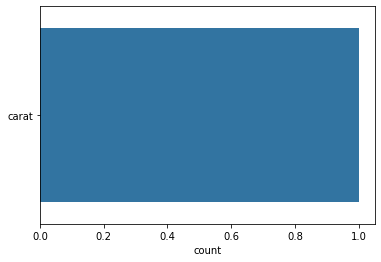

Description of cut
----------------------------------------------------------------------------
count     26933
unique        5
top       Ideal
freq      10805
Name: cut, dtype: object 


Bargraph of cut
----------------------------------------------------------------------------


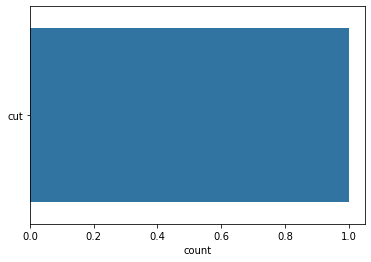

Description of clarity
----------------------------------------------------------------------------
count     26933
unique        8
top         SI1
freq       6565
Name: clarity, dtype: object 


Bargraph of clarity
----------------------------------------------------------------------------


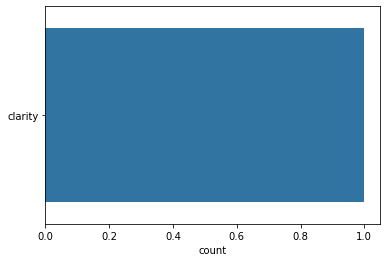

In [34]:
for i in cat:
    univariateAnalysis_categorical(i,7)

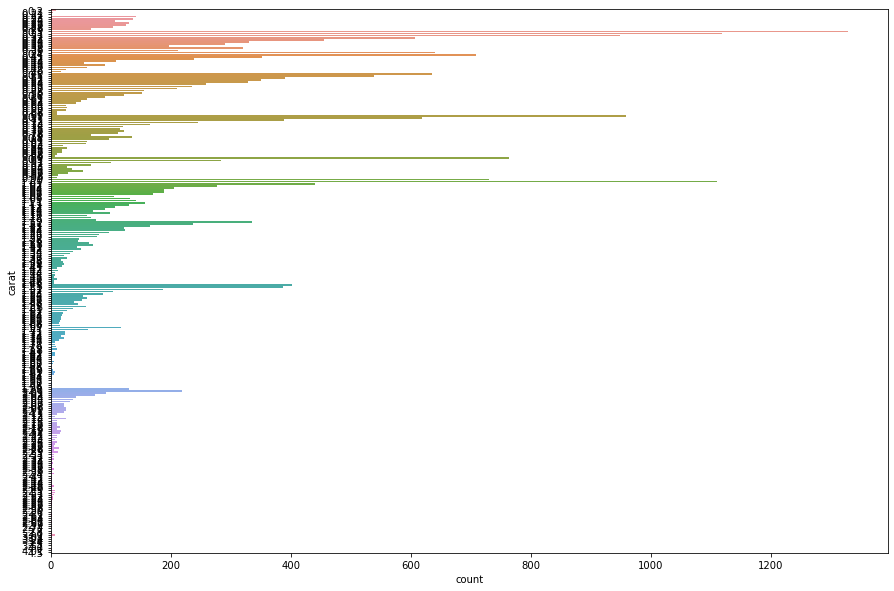

In [35]:
plt.figure(figsize=(15,10))
sns.countplot(data = df1, y = 'carat')
plt.show()

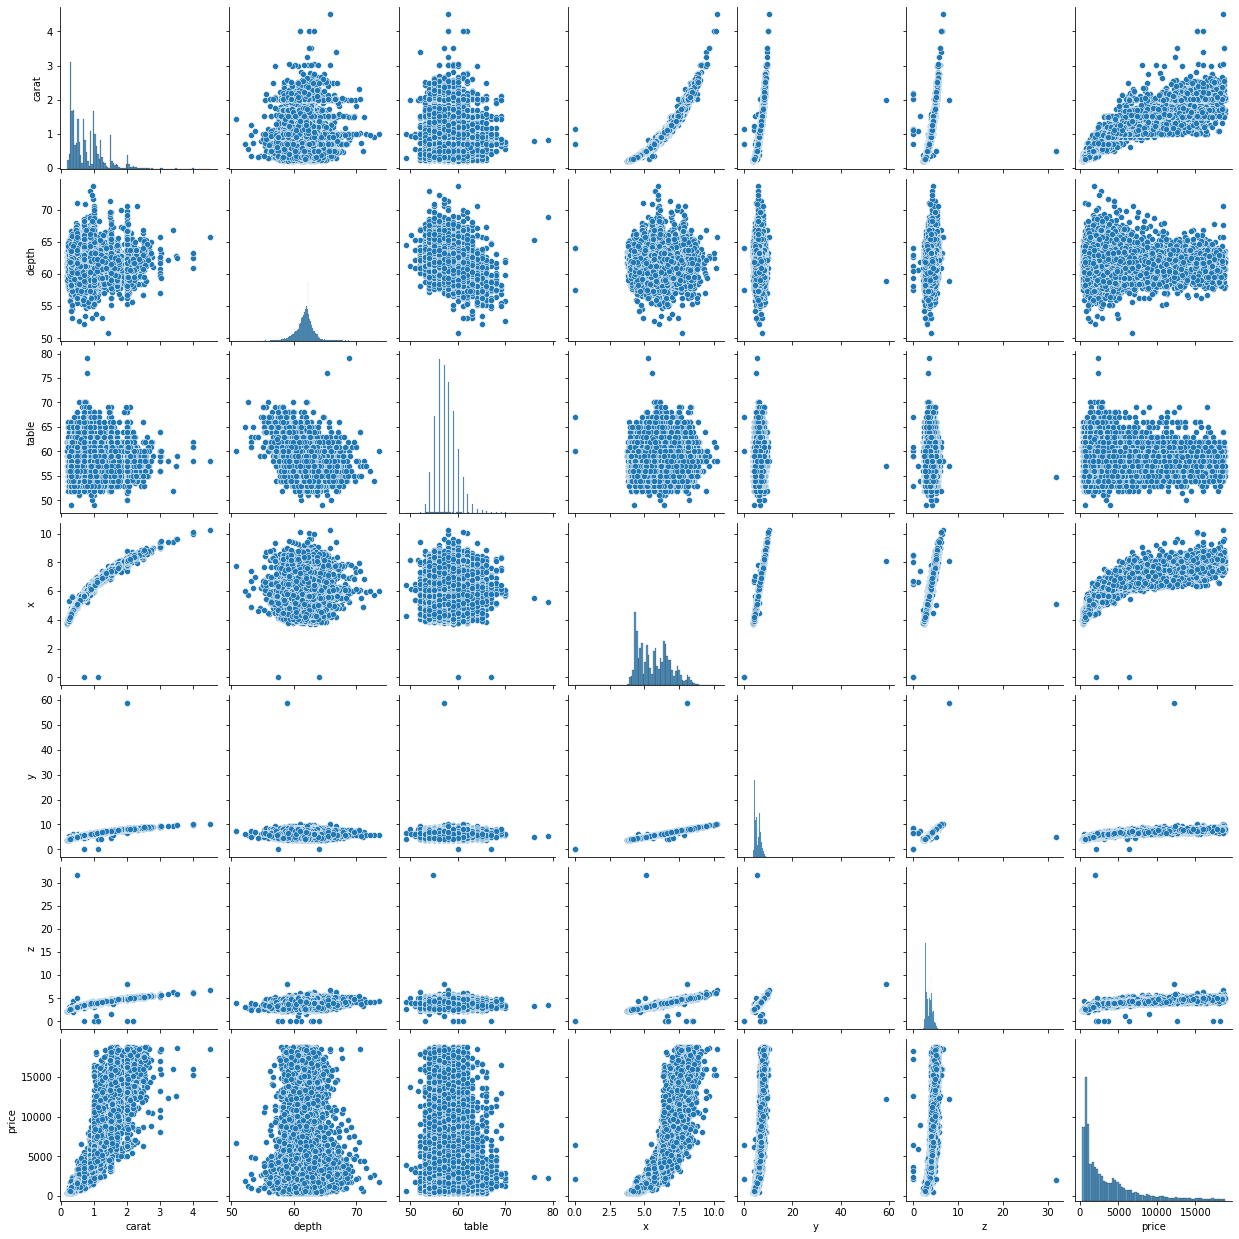

In [36]:
sns.pairplot(df1);

In [37]:
df1.corr()

,carat,depth,table,x,y,z,price
carat,1.000000,0.035240,0.181539,0.976858,0.941442,0.940982,0.922409
depth,0.035240,1.000000,-0.297768,-0.018401,-0.024453,0.101973,-0.002895
table,0.181539,-0.297768,1.000000,0.196254,0.182352,0.148994,0.126844
x,0.976858,-0.018401,0.196254,1.000000,0.962601,0.956490,0.886554
y,0.941442,-0.024453,0.182352,0.962601,1.000000,0.928725,0.856441
z,0.940982,0.101973,0.148994,0.956490,0.928725,1.000000,0.850682
price,0.922409,-0.002895,0.126844,0.886554,0.856441,0.850682,1.000000


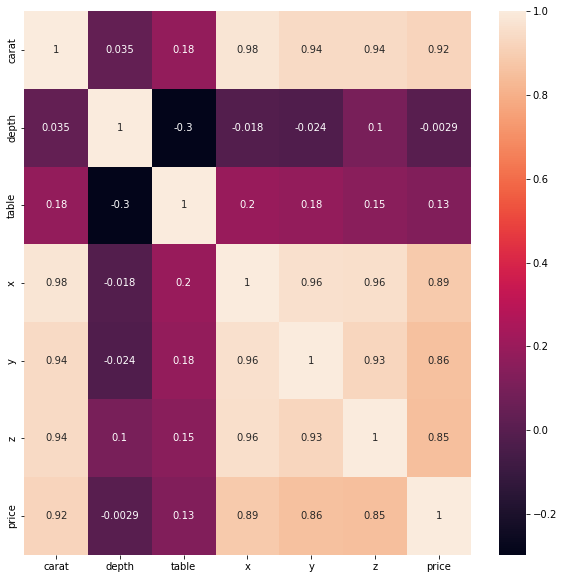

In [38]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(),annot=True);

In [39]:
df1.corr()['price'].sort_values(ascending=False)

price    1.000000
carat    0.922409
x        0.886554
y        0.856441
z        0.850682
table    0.126844
depth   -0.002895
Name: price, dtype: float64

In [40]:
df1.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [41]:
df1.median()

carat       0.70
depth      61.80
table      57.00
x           5.69
y           5.70
z           3.52
price    2375.00
dtype: float64

In [42]:
df1.depth.median()

61.8

In [43]:
df1.depth.fillna(df1.depth.median(),inplace=True)

In [44]:
df1.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [45]:
df1.shape

(26933, 10)

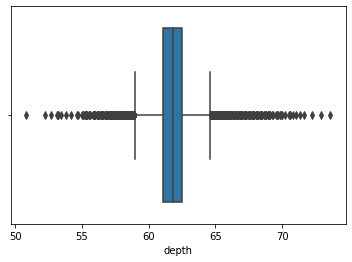

In [46]:
sns.boxplot(data = df1, x = 'depth');

In [47]:
df1.describe()

,carat,depth,table,x,y,z,price
count,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000
mean,0.798010,61.746701,57.455950,5.729346,5.733102,3.537769,3937.526120
std,0.477237,1.393875,2.232156,1.127367,1.165037,0.719964,4022.551862
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.100000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5356.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [48]:
df1[df1.x == 0]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17506,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


In [49]:
df1[df1.x == 0]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17506,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


In [50]:
df1[df1.x == 0]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17506,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


In [51]:
df1 = df1[df1.z != 0]

In [52]:
df1.describe()

,carat,depth,table,x,y,z,price
count,26925.000000,26925.000000,26925.000000,26925.000000,26925.000000,26925.000000,26925.000000
mean,0.797821,61.746982,57.455305,5.729385,5.733152,3.538820,3936.249991
std,0.477085,1.393457,2.231327,1.126081,1.163820,0.717483,4020.983187
min,0.200000,50.800000,49.000000,3.730000,3.710000,1.070000,326.000000
25%,0.400000,61.100000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,2373.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5353.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [53]:
df1.shape

(26925, 10)

In [54]:
num.mean()

carat       0.793298
depth      61.745285
table      57.435544
x           5.729323
y           5.731255
z           3.536928
price    3735.832213
dtype: float64

In [55]:
num.std()

carat       0.462127
depth       1.412243
table       2.157119
x           1.126175
y           1.118155
z           0.696753
price    3468.207359
dtype: float64

In [56]:
df1.cut.value_counts()

Ideal        10805
Premium       6880
Very Good     6027
Good          2434
Fair           779
Name: cut, dtype: int64

In [57]:
df1.cut = np.where(df1.cut == 'Ideal', 4, df1.cut)
df1.cut = np.where(df1.cut == 'Premium', 3, df1.cut)
df1.cut = np.where(df1.cut == 'Very Good', 2, df1.cut)
df1.cut = np.where(df1.cut == 'Good', 1, df1.cut)
df1.cut = np.where(df1.cut == 'Fair', 0, df1.cut)

In [58]:
df1.color.value_counts()

G    5650
E    4916
F    4722
H    4091
D    3341
I    2765
J    1440
Name: color, dtype: int64

In [59]:
df1.color = np.where(df1.color == 'D', 6, df1.color)
df1.color = np.where(df1.color == 'E', 5, df1.color)
df1.color = np.where(df1.color == 'F', 4, df1.color)
df1.color = np.where(df1.color == 'G', 3, df1.color)
df1.color = np.where(df1.color == 'H', 2, df1.color)
df1.color = np.where(df1.color == 'I', 1, df1.color)
df1.color = np.where(df1.color == 'J', 0, df1.color)

In [60]:
df1.clarity.value_counts()

SI1     6564
VS2     6092
SI2     4561
VS1     4086
VVS2    2530
VVS1    1839
IF       891
I1       362
Name: clarity, dtype: int64

In [61]:
df1.clarity = np.where(df1.clarity == 'IF', 7, df1.clarity)
df1.clarity = np.where(df1.clarity == 'VVS1', 6, df1.clarity)
df1.clarity = np.where(df1.clarity == 'VVS2', 5, df1.clarity)
df1.clarity = np.where(df1.clarity == 'VS1', 4, df1.clarity)
df1.clarity = np.where(df1.clarity == 'VS2', 3, df1.clarity)
df1.clarity = np.where(df1.clarity == 'SI1', 2, df1.clarity)
df1.clarity = np.where(df1.clarity == 'SI2', 1, df1.clarity)
df1.clarity = np.where(df1.clarity == 'I1', 0, df1.clarity)

In [62]:
df1.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [63]:
df1.cut = df1['cut'].astype('int64')
df1.color = df1['color'].astype('int64')
df1.clarity = df1['clarity'].astype('int64')

In [64]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26925 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26925 non-null  float64
 1   cut      26925 non-null  int64  
 2   color    26925 non-null  int64  
 3   clarity  26925 non-null  int64  
 4   depth    26925 non-null  float64
 5   table    26925 non-null  float64
 6   x        26925 non-null  float64
 7   y        26925 non-null  float64
 8   z        26925 non-null  float64
 9   price    26925 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 2.3 MB


In [65]:
df1.head(10)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,4,5,2,62.1,58.0,4.27,4.29,2.66,499
1,0.33,3,3,7,60.8,58.0,4.42,4.46,2.70,984
2,0.90,2,5,5,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,4,4,4,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,4,4,6,60.4,59.0,4.35,4.43,2.65,779
5,1.02,4,6,3,61.5,56.0,6.46,6.49,3.99,9502
6,1.01,1,2,2,63.7,60.0,6.35,6.30,4.03,4836
7,0.50,3,5,2,61.5,62.0,5.09,5.06,3.12,1415
8,1.21,1,2,2,63.8,64.0,6.72,6.63,4.26,5407
9,0.35,4,4,3,60.5,57.0,4.52,4.60,2.76,706


In [66]:
df1.tail(10)

,carat,cut,color,clarity,depth,table,x,y,z,price
26957,2.09,3,2,1,60.6,59.0,8.27,8.22,5.00,17805
26958,1.37,3,5,1,61.0,57.0,7.25,7.19,4.40,6751
26959,1.05,2,5,1,63.2,59.0,6.43,6.36,4.04,4281
26960,1.10,2,6,1,61.8,63.0,6.76,6.69,3.94,4361
26961,0.25,3,4,5,62.0,59.0,4.04,3.99,2.49,740
26962,1.11,3,3,2,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,4,2,7,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,3,5,3,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,2,4,5,61.8,56.0,4.19,4.20,2.60,682
26966,1.25,3,0,2,62.0,58.0,6.90,6.88,4.27,5166


In [67]:
X = df1.drop('price',axis=1)
y = df1.pop('price')

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [69]:
from sklearn import set_config
set_config(print_changed_only = False)

In [70]:
model = LinearRegression()
reg = model.fit(X_train, y_train)
reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False,
                 positive=False)

In [71]:
#Coefficients
reg.coef_

array([ 1.10544572e+04,  1.07388793e+02,  3.29602641e+02,  5.02959110e+02,
       -8.43447728e+01, -3.55755582e+01, -9.51975419e+02,  6.67299055e+00,
       -4.21355771e+01])

In [72]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, reg.coef_[idx]))

The coefficient for carat is 11054.457219364163
The coefficient for cut is 107.3887926665326
The coefficient for color is 329.60264062819556
The coefficient for clarity is 502.95911003510736
The coefficient for depth is -84.34477277815279
The coefficient for table is -35.57555822491116
The coefficient for x is -951.9754192867972
The coefficient for y is 6.672990548416351
The coefficient for z is -42.13557708609784


In [73]:
#intercept for the model
intercept = reg.intercept_
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 4966.08268105756


In [74]:
#R square on train data
reg.score(X_train, y_train)

0.9079853166461039

In [75]:
#R square on test data
reg.score(X_test, y_test)

0.90961736882177

In [76]:
#RMSE on train data
predicted_train=model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

1215.8035529418505

In [77]:
#RMSE on test data
predicted_test=model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

1217.778984191432

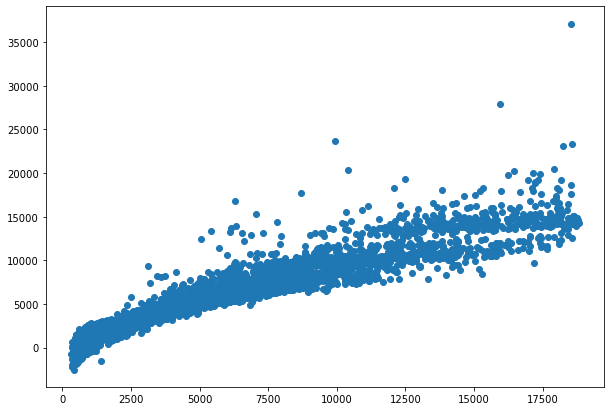

In [78]:
#Regression plot
y_pred = model.predict(X_test)
plt.figure(figsize=(10,7))
plt.scatter(y_test, y_pred,);

In [79]:
vif_series = pd.Series([variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,)
print("VIF values: \n\n{}\n".format(vif_series))

VIF values: 

carat       82.505030
cut          8.872794
color        5.560028
clarity      5.299882
depth      536.040109
table      538.639316
x          982.748314
y          248.158344
z          279.195777
dtype: float64



In [80]:
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)

In [81]:
data_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
5030,1.10,1,5,1,63.3,56.0,6.53,6.58,4.15,4065
12108,1.01,2,6,1,64.0,56.0,6.30,6.38,4.06,5166
20181,0.67,1,1,3,60.7,61.4,5.60,5.64,3.41,1708
4712,0.76,1,3,2,57.7,63.0,6.05,5.97,3.47,2447
2548,1.01,3,3,4,62.8,59.0,6.37,6.34,3.99,6618


In [82]:
data_test.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
11971,1.51,2,1,2,63.0,59.0,7.26,7.31,4.59,8758
3294,1.02,3,3,2,60.8,58.0,6.50,6.46,3.94,4718
25427,2.05,3,6,1,60.0,58.0,8.31,8.23,4.96,12891
709,1.71,2,4,4,61.9,61.0,7.61,7.67,4.73,17685
8010,1.50,1,2,3,63.9,59.0,7.25,7.18,4.61,8165


In [83]:
data_train.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [84]:
#Linear Regression using stats model
olsmod1 = smf.ols(formula= 'price ~ carat+cut+color+clarity+depth+table+x+y+z', data = data_train)
olsres1 = olsmod1.fit()
olsres1.params

Intercept     4966.082681
carat        11054.457219
cut            107.388793
color          329.602641
clarity        502.959110
depth          -84.344773
table          -35.575558
x             -951.975419
y                6.672991
z              -42.135577
dtype: float64

In [85]:
print(olsres1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                 2.065e+04
Date:                Wed, 19 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:24:04   Log-Likelihood:            -1.6062e+05
No. Observations:               18847   AIC:                         3.213e+05
Df Residuals:                   18837   BIC:                         3.213e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4966.0827    717.308      6.923      0.0

In [86]:
#MSE on train data
mse = np.mean((olsres1.predict(data_train.drop('price',axis=1))-data_train['price'])**2)

In [87]:
mse

1478178.279346027

In [88]:
#RMSE on train data
np.sqrt(mse)

1215.8035529418505

In [89]:
#MSE on test data
mse1 = np.mean((olsres1.predict(data_test.drop('price',axis=1))-data_test['price'])**2)
mse1

1482985.6543383177

In [90]:
#RMSE on test data
np.sqrt(mse1)

1217.7789841914328

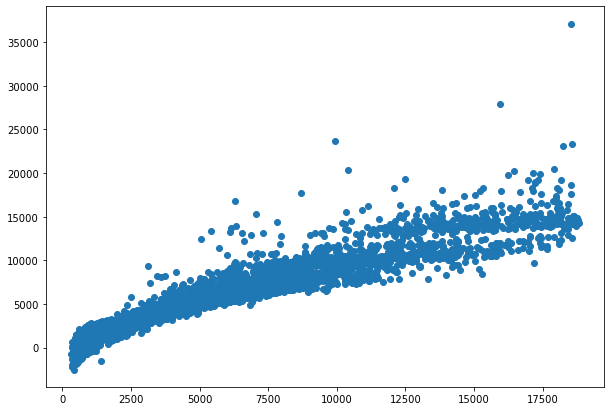

In [91]:
#prediction on test data
y_pred = olsres1.predict(data_test)
plt.figure(figsize=(10,7))
plt.scatter( y_test, y_pred)
plt.show()

In [92]:
vif_series = pd.Series([variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,)
print("VIF values: \n\n{}\n".format(vif_series))

VIF values: 

carat       82.505030
cut          8.872794
color        5.560028
clarity      5.299882
depth      536.040109
table      538.639316
x          982.748314
y          248.158344
z          279.195777
dtype: float64



In [93]:
for i,j in np.array(olsres1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(4966.08) * Intercept + (11054.46) * carat + (107.39) * cut + (329.6) * color + (502.96) * clarity + (-84.34) * depth + (-35.58) * table + (-951.98) * x + (6.67) * y + (-42.14) * z + 

In [94]:
df2 = pd.read_csv('Holiday_Package.csv')

In [95]:
df2.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [96]:
df2.tail()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
867,868,no,40030,24,4,2,1,yes
868,869,yes,32137,48,8,0,0,yes
869,870,no,25178,24,6,2,0,yes
870,871,yes,55958,41,10,0,1,yes
871,872,no,74659,51,10,0,0,yes


In [97]:
df2.drop('Unnamed: 0', axis = 1, inplace=True)

In [98]:
df2.rename(columns = {'Holliday_Package':'holiday_package','Salary':'salary'}, inplace = True)

In [99]:
df2.head()

,holiday_package,salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [100]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   holiday_package    872 non-null    object
 1   salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [101]:
df2.shape

(872, 7)

In [102]:
df2.describe()

,salary,age,educ,no_young_children,no_older_children
count,872.000000,872.000000,872.000000,872.000000,872.000000
mean,47729.172018,39.955275,9.307339,0.311927,0.982798
std,23418.668531,10.551675,3.036259,0.612870,1.086786
min,1322.000000,20.000000,1.000000,0.000000,0.000000
25%,35324.000000,32.000000,8.000000,0.000000,0.000000
50%,41903.500000,39.000000,9.000000,0.000000,1.000000
75%,53469.500000,48.000000,12.000000,0.000000,2.000000
max,236961.000000,62.000000,21.000000,3.000000,6.000000


In [103]:
df2.describe(include='O')

,holiday_package,foreign
count,872,872
unique,2,2
top,no,no
freq,471,656


In [104]:
df2.isnull().sum()

holiday_package      0
salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [105]:
df2.duplicated().sum()

0

In [106]:
df2.holiday_package.unique()

array(['no', 'yes'], dtype=object)

In [107]:
df2.foreign.unique()

array(['no', 'yes'], dtype=object)

In [108]:
num2 = df2[['salary','age','educ','no_young_children','no_older_children']]
cat2 = df2[['holiday_package','foreign']]

In [109]:
for i in cat2:
    print(i)
    print(cat2[i].value_counts())

holiday_package
no     471
yes    401
Name: holiday_package, dtype: int64
foreign
no     656
yes    216
Name: foreign, dtype: int64


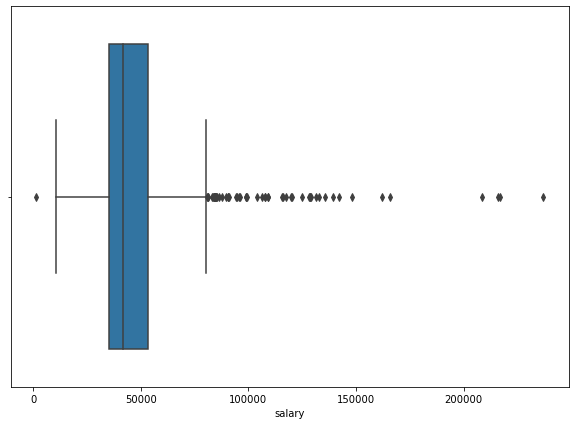

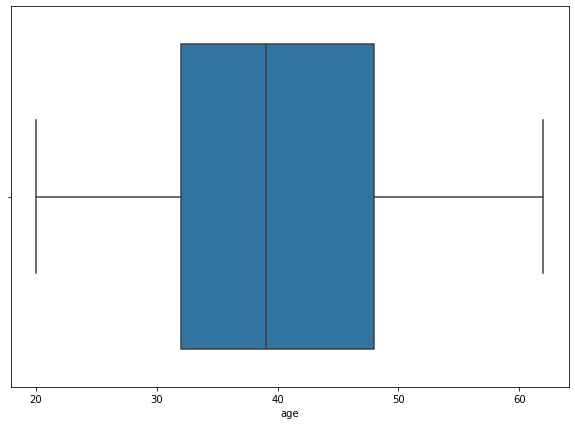

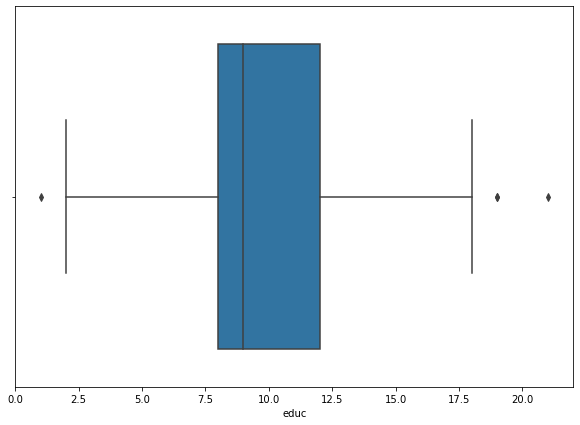

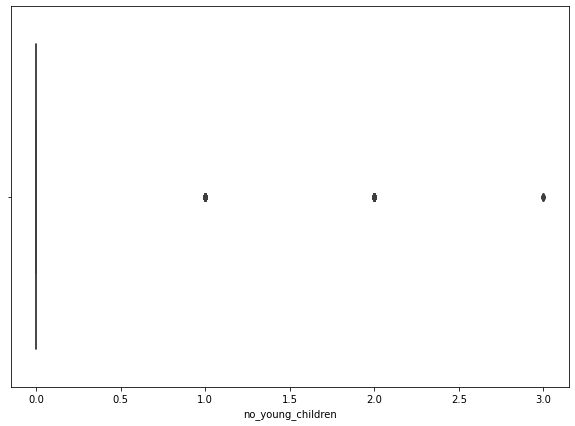

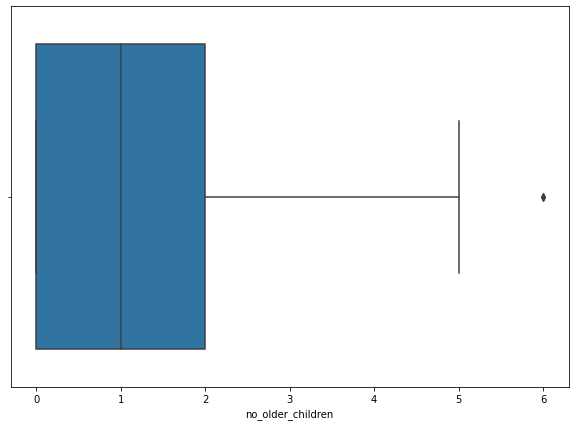

In [110]:
for i in num2:
    plt.figure(figsize=(10,7))
    sns.boxplot(data = df2, x = num2[i])
    plt.show()

In [111]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [112]:
for column in num2.columns:
    lr,ur=remove_outlier(num2[column])
    num2[column]=np.where(num2[column]>ur,ur,num2[column])
    num2[column]=np.where(num2[column]<lr,lr,num2[column])

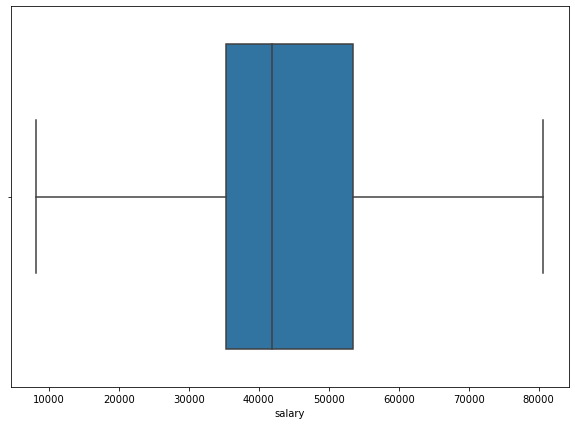

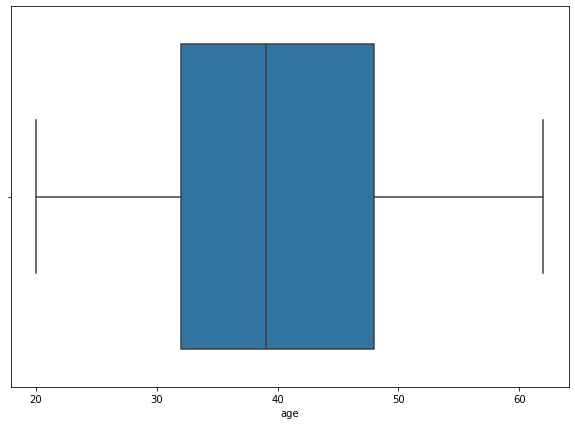

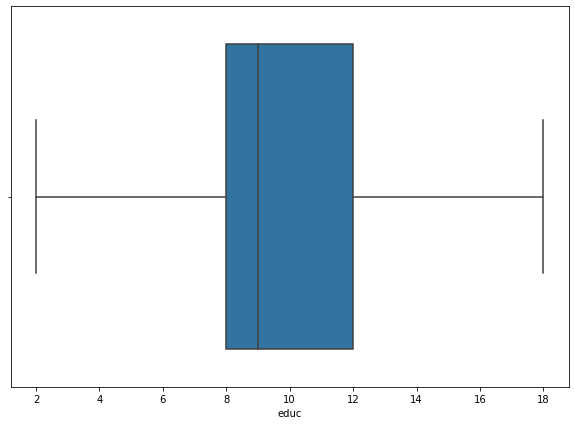

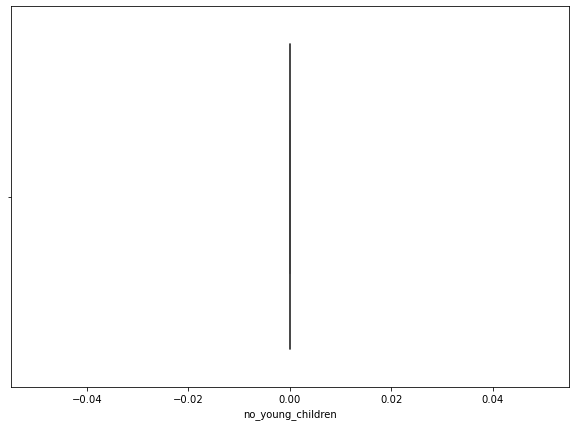

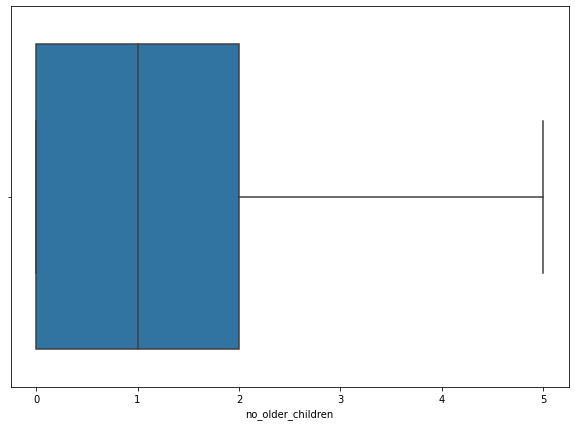

In [113]:
for i in num2:
    plt.figure(figsize=(10,7))
    sns.boxplot(data = df2, x = num2[i])
    plt.show()

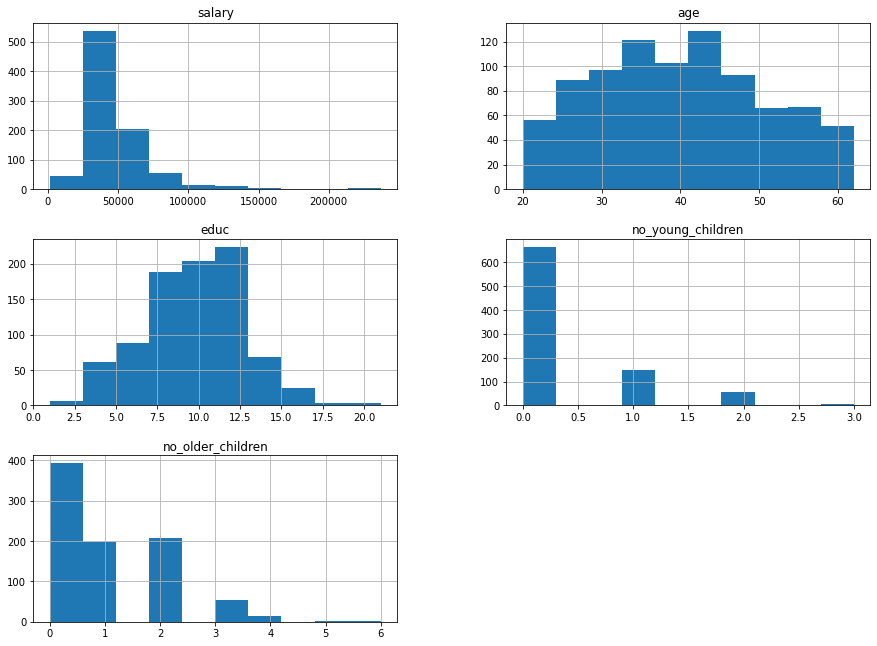

In [114]:
df2.hist(figsize=(15,15),layout=(4,2));

In [115]:
df2.skew()

salary               3.103216
age                  0.146412
educ                -0.045501
no_young_children    1.946515
no_older_children    0.953951
dtype: float64

In [116]:
from scipy.stats import shapiro
for i in num2:
    print(shapiro(df2[i]))

ShapiroResult(statistic=0.7492235898971558, pvalue=2.4762693079708643e-34)
ShapiroResult(statistic=0.9752488732337952, pvalue=5.2461784916246756e-11)
ShapiroResult(statistic=0.9763790369033813, pvalue=1.1150673440152303e-10)
ShapiroResult(statistic=0.5587472915649414, pvalue=3.7793019582840316e-42)
ShapiroResult(statistic=0.8120757341384888, pvalue=1.1551630945700133e-30)


In [117]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(num2[column].describe(),end=' ')
    print('')
    print('')
    print('')
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(num2[column], kde=True, color='r');
    plt.show()
    
    plt.figure()
    print("Boxplot of " + column)
    print("----------------------------------------------------------------------------")
    sns.boxplot(num2[column]);
    plt.show()

Description of salary
----------------------------------------------------------------------------
count      872.000000
mean     45608.336869
std      15699.745151
min       8105.750000
25%      35324.000000
50%      41903.500000
75%      53469.500000
max      80687.750000
Name: salary, dtype: float64 


Distribution of salary
----------------------------------------------------------------------------


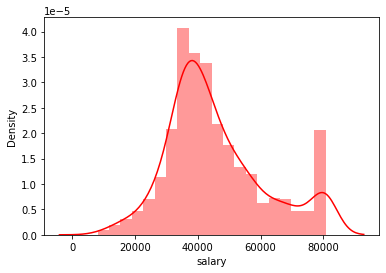

Boxplot of salary
----------------------------------------------------------------------------


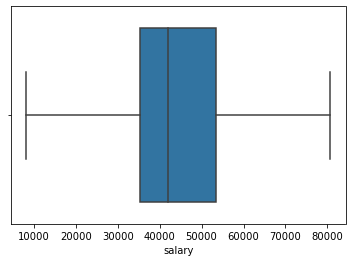

Description of age
----------------------------------------------------------------------------
count    872.000000
mean      39.955275
std       10.551675
min       20.000000
25%       32.000000
50%       39.000000
75%       48.000000
max       62.000000
Name: age, dtype: float64 


Distribution of age
----------------------------------------------------------------------------


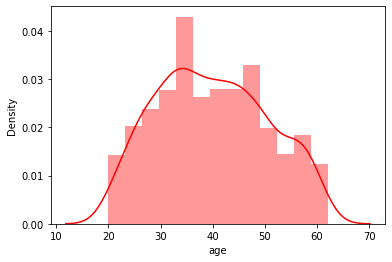

Boxplot of age
----------------------------------------------------------------------------


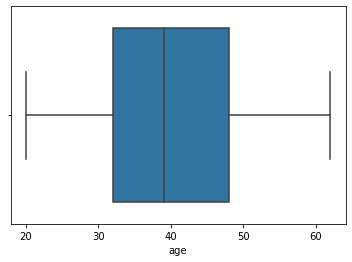

Description of educ
----------------------------------------------------------------------------
count    872.000000
mean       9.302752
std        3.014712
min        2.000000
25%        8.000000
50%        9.000000
75%       12.000000
max       18.000000
Name: educ, dtype: float64 


Distribution of educ
----------------------------------------------------------------------------


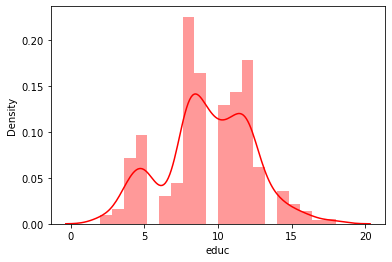

Boxplot of educ
----------------------------------------------------------------------------


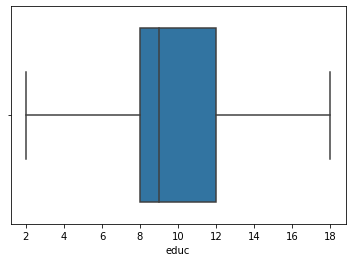

Description of no_young_children
----------------------------------------------------------------------------
count    872.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: no_young_children, dtype: float64 


Distribution of no_young_children
----------------------------------------------------------------------------


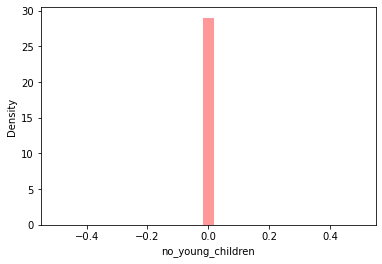

Boxplot of no_young_children
----------------------------------------------------------------------------


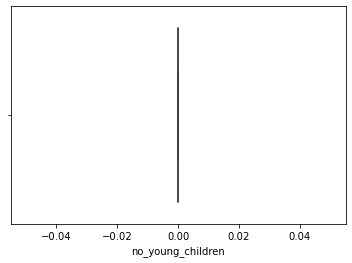

Description of no_older_children
----------------------------------------------------------------------------
count    872.000000
mean       0.980505
std        1.077197
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        5.000000
Name: no_older_children, dtype: float64 


Distribution of no_older_children
----------------------------------------------------------------------------


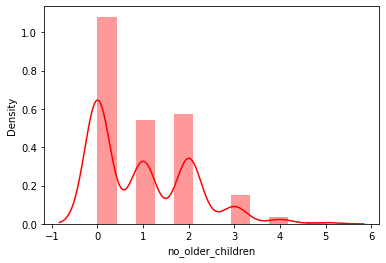

Boxplot of no_older_children
----------------------------------------------------------------------------


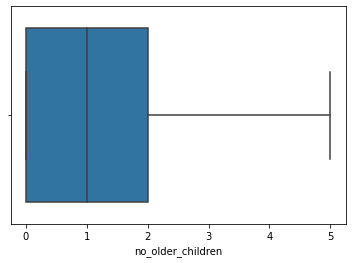

In [118]:
for i in num2:
    univariateAnalysis_numeric(i,7)

In [119]:
def univariateAnalysis_categorical(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df2[column].describe(include='O'),end=' ')
    print('')
    print('')
    
    plt.figure()
    print("Bargraph of " + column)
    print("----------------------------------------------------------------------------")
    sns.countplot(y=df2[column]);
    plt.show()

Description of holiday_package
----------------------------------------------------------------------------
count     872
unique      2
top        no
freq      471
Name: holiday_package, dtype: object 

Bargraph of holiday_package
----------------------------------------------------------------------------


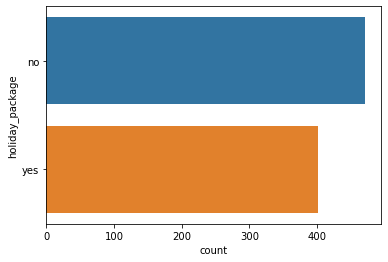

Description of foreign
----------------------------------------------------------------------------
count     872
unique      2
top        no
freq      656
Name: foreign, dtype: object 

Bargraph of foreign
----------------------------------------------------------------------------


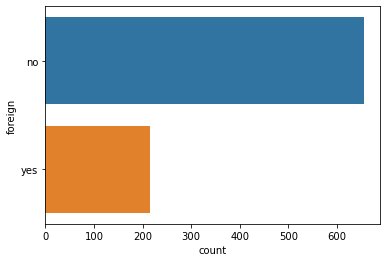

In [120]:
for i in cat2:
    univariateAnalysis_categorical(i,7)

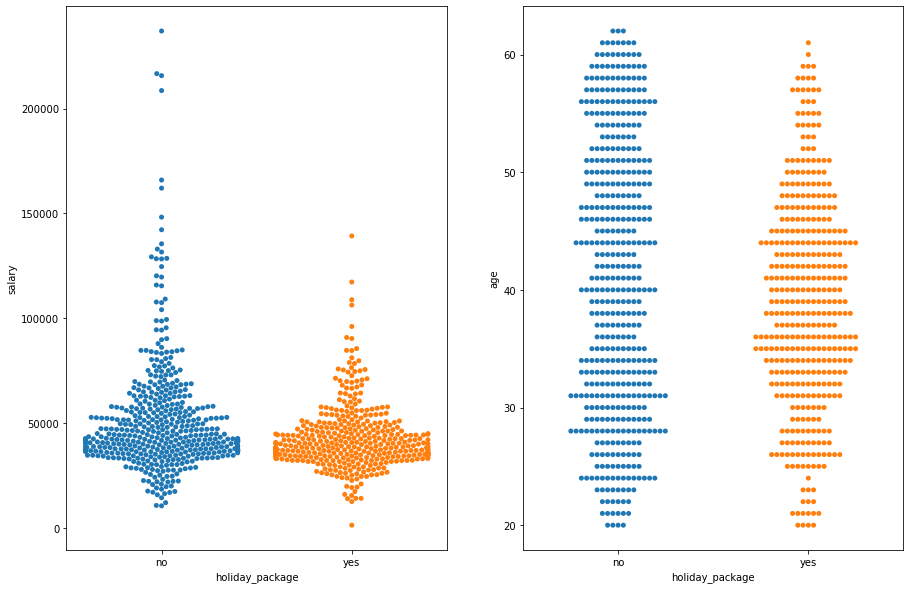

In [121]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.swarmplot(data=df2,x='holiday_package', y='salary')
plt.subplot(1,2,2)
sns.swarmplot(data=df2,x='holiday_package', y='age')
plt.show()

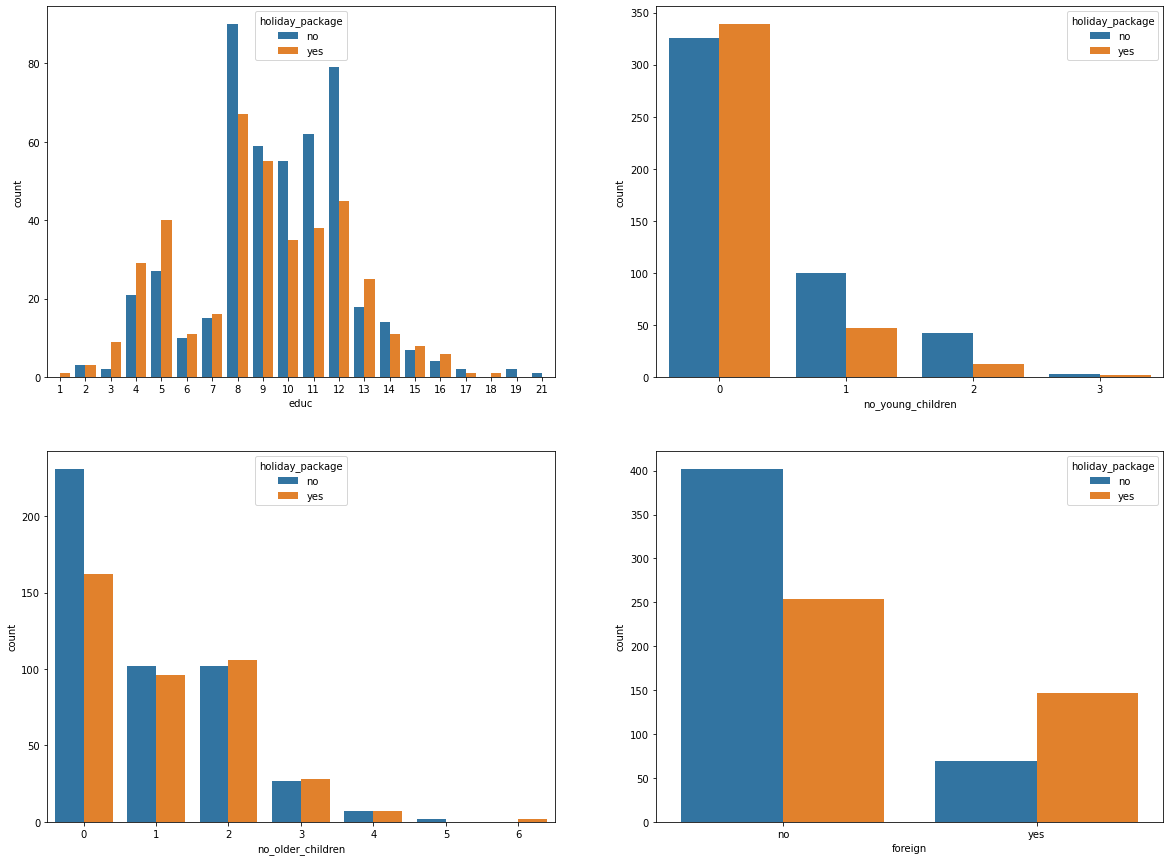

In [122]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.countplot(data=df2,hue='holiday_package', x='educ')
plt.subplot(2,2,2)
sns.countplot(data=df2,hue='holiday_package', x='no_young_children')
plt.subplot(2,2,3)
sns.countplot(data=df2,hue='holiday_package', x='no_older_children')
plt.subplot(2,2,4)
sns.countplot(data=df2,hue='holiday_package', x='foreign')
plt.show()

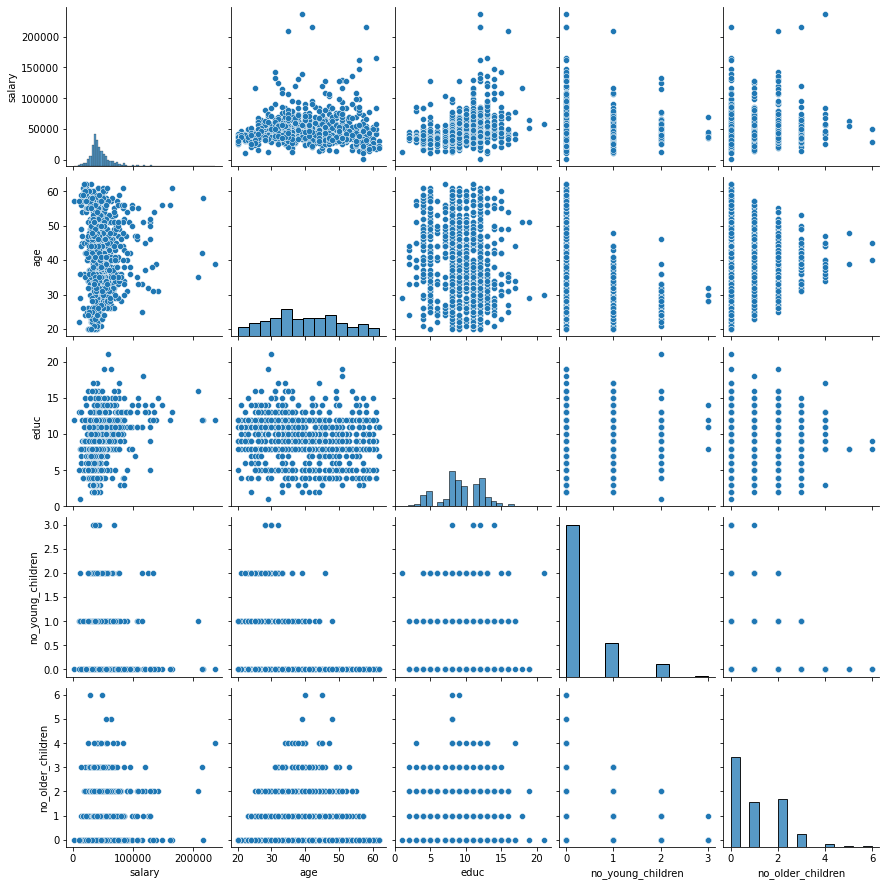

In [123]:
sns.pairplot(df2);

In [124]:
df2.corr()

,salary,age,educ,no_young_children,no_older_children
salary,1.000000,0.071709,0.326540,-0.029664,0.113772
age,0.071709,1.000000,-0.149294,-0.519093,-0.116205
educ,0.326540,-0.149294,1.000000,0.098350,-0.036321
no_young_children,-0.029664,-0.519093,0.098350,1.000000,-0.238428
no_older_children,0.113772,-0.116205,-0.036321,-0.238428,1.000000


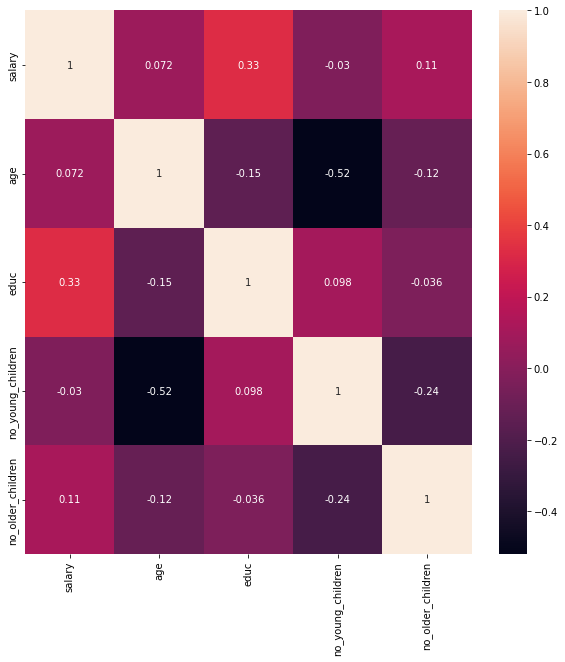

In [125]:
plt.figure(figsize=(10,10))
sns.heatmap(df2.corr(),annot=True);

In [126]:
df2['holiday_package'] = pd.Categorical(df2['holiday_package']).codes
df2['foreign'] = pd.Categorical(df2['foreign']).codes

In [127]:
df2['holiday_package'].value_counts()

0    471
1    401
Name: holiday_package, dtype: int64

In [128]:
df2['foreign'].value_counts()

0    656
1    216
Name: foreign, dtype: int64

In [129]:
df2.head()

,holiday_package,salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412,30,8,1,1,0
1,1,37207,45,8,0,1,0
2,0,58022,46,9,0,0,0
3,0,66503,31,11,2,0,0
4,0,66734,44,12,0,2,0


In [130]:
df2.tail()

,holiday_package,salary,age,educ,no_young_children,no_older_children,foreign
867,0,40030,24,4,2,1,1
868,1,32137,48,8,0,0,1
869,0,25178,24,6,2,0,1
870,1,55958,41,10,0,1,1
871,0,74659,51,10,0,0,1


In [131]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   holiday_package    872 non-null    int8 
 1   salary             872 non-null    int64
 2   age                872 non-null    int64
 3   educ               872 non-null    int64
 4   no_young_children  872 non-null    int64
 5   no_older_children  872 non-null    int64
 6   foreign            872 non-null    int8 
dtypes: int64(5), int8(2)
memory usage: 35.9 KB


In [132]:
X = df2.drop('holiday_package',axis=1)
y = df2['holiday_package']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [133]:
lr_model = LogisticRegression(random_state=1)
lr_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [134]:
param_grid = {
    'penalty':['l2','none','l1'],
    'max_iter':[1000,5000,10000],
    'n_jobs':[-1,0,1,2],
    'solver':['lbfgs','newton-cg','sag']
    }

In [135]:
lr_model = LogisticRegression(random_state=1)

In [136]:
grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=3)

In [137]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=1, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             n_jobs=None,
             param_grid={'max_iter': [1000, 5000, 10000],
                         'n_jobs': [-1, 0, 1, 2],
                         'penalty': ['l2', 'none', 'l1'],
                         'solver': ['lbfgs', 'newton-cg', 'sag']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [138]:
grid_search.best_params_

{'max_iter': 1000, 'n_jobs': -1, 'penalty': 'l2', 'solver': 'newton-cg'}

In [139]:
grid_search.best_estimator_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='newton-cg', tol=0.0001, verbose=0, warm_start=False)

In [140]:
best_grid = grid_search.best_estimator_

In [141]:
ytrain_predict1 = best_grid.predict(X_train)
ytest_predict1 = best_grid.predict(X_test)

In [142]:
ytrain_predict2 = best_grid.predict_proba(X_train)
ytest_predict2 = best_grid.predict_proba(X_test)

In [143]:
confusion_matrix(y_train, ytrain_predict1)

array([[252,  74],
       [121, 163]], dtype=int64)

<AxesSubplot:>

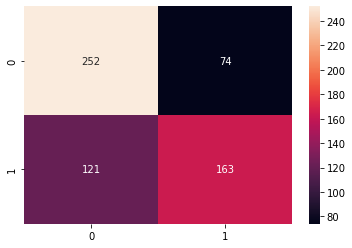

In [144]:
sns.heatmap(confusion_matrix(y_train, ytrain_predict1),annot=True,fmt='.5g')

In [145]:
confusion_matrix(y_test, ytest_predict1)

array([[102,  43],
       [ 50,  67]], dtype=int64)

<AxesSubplot:>

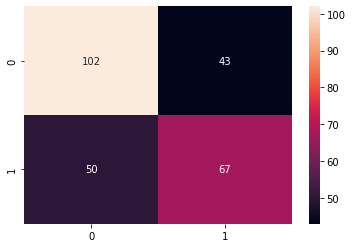

In [146]:
sns.heatmap(confusion_matrix(y_test, ytest_predict1),annot=True,fmt='.5g')

In [147]:
print(classification_report(y_train, ytrain_predict1))

              precision    recall  f1-score   support

           0       0.68      0.77      0.72       326
           1       0.69      0.57      0.63       284

    accuracy                           0.68       610
   macro avg       0.68      0.67      0.67       610
weighted avg       0.68      0.68      0.68       610



In [148]:
print(classification_report(y_test, ytest_predict1))

              precision    recall  f1-score   support

           0       0.67      0.70      0.69       145
           1       0.61      0.57      0.59       117

    accuracy                           0.65       262
   macro avg       0.64      0.64      0.64       262
weighted avg       0.64      0.65      0.64       262



AUC 0.743


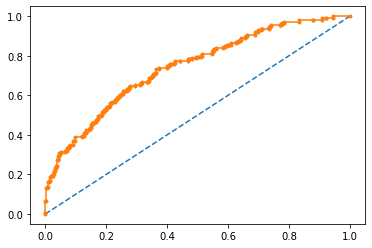

In [149]:
probs = best_grid.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC 0.705


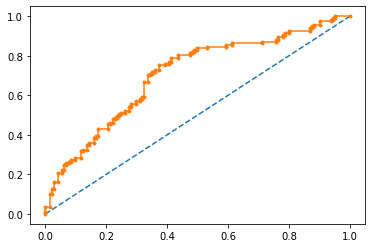

In [150]:
probs = best_grid.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [151]:
best_grid.intercept_

array([2.24752092])

In [152]:
clf = LinearDiscriminantAnalysis()
lda_model=clf.fit(X_train, y_train)
lda_model

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)

In [153]:
ytrain_predict1 = lda_model.predict(X_train)
ytest_predict1 = lda_model.predict(X_test)
ytrain_predict2 = lda_model.predict_proba(X_train)
ytest_predict2 = lda_model.predict_proba(X_test)

In [154]:
confusion_matrix(y_train, ytrain_predict1)

array([[252,  74],
       [126, 158]], dtype=int64)

<AxesSubplot:>

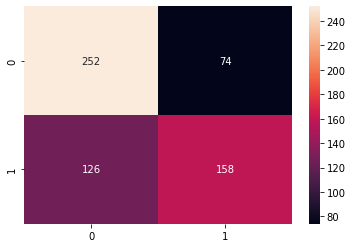

In [155]:
sns.heatmap(confusion_matrix(y_train, ytrain_predict1),annot=True,fmt='.5g')

In [156]:
confusion_matrix(y_test, ytest_predict1)

array([[103,  42],
       [ 52,  65]], dtype=int64)

<AxesSubplot:>

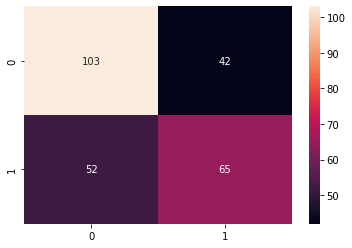

In [157]:
sns.heatmap(confusion_matrix(y_test, ytest_predict1),annot=True,fmt='.5g')

In [158]:
print(classification_report(y_train, ytrain_predict1))

              precision    recall  f1-score   support

           0       0.67      0.77      0.72       326
           1       0.68      0.56      0.61       284

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.67       610



In [159]:
print(classification_report(y_test, ytest_predict1))

              precision    recall  f1-score   support

           0       0.66      0.71      0.69       145
           1       0.61      0.56      0.58       117

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.64       262



AUC 0.742


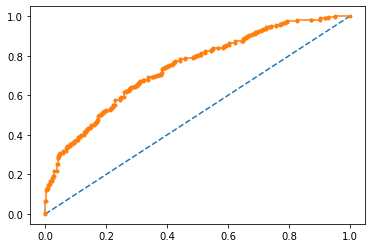

In [160]:
probs = lda_model.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC 0.703


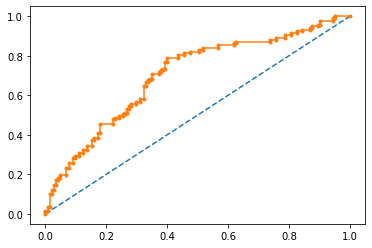

In [161]:
probs = lda_model.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [162]:
lda_model.intercept_

array([2.08934324])

In [163]:
df2.columns

Index(['holiday_package', 'salary', 'age', 'educ', 'no_young_children',
       'no_older_children', 'foreign'],
      dtype='object')

In [164]:
A1 = 'holiday_package ~ salary+age+educ+no_young_children+no_older_children+foreign'

In [165]:
model_1 = smf.logit(formula =A1, data =df2).fit()
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.601531
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        holiday_package   No. Observations:                  872
Model:                          Logit   Df Residuals:                      865
Method:                           MLE   Df Model:                            6
Date:                Wed, 19 Oct 2022   Pseudo R-squ.:                  0.1281
Time:                        22:26:37   Log-Likelihood:                -524.53
converged:                       True   LL-Null:                       -601.61
Covariance Type:            nonrobust   LLR p-value:                 1.023e-30
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.3259      0.554      4.199      0.000       1.240       3.411
salary            -1.814e-05   4.35e-06     -4.169      0.000   -2.67e-05   -9.61e-06
age                  -0.0482      0.009     -5.314      0.000      -0.066      -0.030
educ                  0.0392      0.029      1.337      0.181      -0.018       0.097
no_young_children    -1.3173      0.180     -7.326      0.000      -1.670      -0.965
no_older_children    -0.0204      0.074     -0.276      0.782      -0.165       0.124
foreign               1.3216      0.200      6.601      0.000       0.929       1.714
=====================================================================================
"""

In [166]:
A1 = 'holiday_package ~ salary+age+educ+no_young_children+foreign'
model_1 = smf.logit(formula =A1, data =df2).fit()
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.601574
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        holiday_package   No. Observations:                  872
Model:                          Logit   Df Residuals:                      866
Method:                           MLE   Df Model:                            5
Date:                Wed, 19 Oct 2022   Pseudo R-squ.:                  0.1281
Time:                        22:26:37   Log-Likelihood:                -524.57
converged:                       True   LL-Null:                       -601.61
Covariance Type:            nonrobust   LLR p-value:                 1.808e-31
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.2705      0.516      4.403      0.000       1.260       3.281
salary            -1.831e-05   4.31e-06     -4.249      0.000   -2.68e-05   -9.86e-06
age                  -0.0474      0.009     -5.511      0.000      -0.064      -0.031
educ                  0.0399      0.029      1.367      0.172      -0.017       0.097
no_young_children    -1.3004      0.169     -7.711      0.000      -1.631      -0.970
foreign               1.3210      0.200      6.599      0.000       0.929       1.713
=====================================================================================
"""

In [167]:
A1 = 'holiday_package ~ salary+age+no_young_children+foreign'
model_1 = smf.logit(formula =A1, data =df2).fit()
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.602653
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        holiday_package   No. Observations:                  872
Model:                          Logit   Df Residuals:                      867
Method:                           MLE   Df Model:                            4
Date:                Wed, 19 Oct 2022   Pseudo R-squ.:                  0.1265
Time:                        22:26:37   Log-Likelihood:                -525.51
converged:                       True   LL-Null:                       -601.61
Covariance Type:            nonrobust   LLR p-value:                 6.885e-32
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.6725      0.426      6.278      0.000       1.838       3.507
salary            -1.664e-05   4.08e-06     -4.075      0.000   -2.46e-05   -8.64e-06
age                  -0.0495      0.008     -5.843      0.000      -0.066      -0.033
no_young_children    -1.2946      0.169     -7.669      0.000      -1.625      -0.964
foreign               1.2124      0.183      6.634      0.000       0.854       1.571
=====================================================================================
"""

In [168]:
model_1.params

Intercept            2.672546
salary              -0.000017
age                 -0.049470
no_young_children   -1.294575
foreign              1.212439
dtype: float64

In [169]:
for i,j in np.array(model_1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(2.67) * Intercept + (-0.0) * salary + (-0.05) * age + (-1.29) * no_young_children + (1.21) * foreign + 